<a href="https://colab.research.google.com/github/natandias/minicursoPython/blob/master/curso_de_python_alunos_parte_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bem vindos à segunda parte do curso intensivo de


![Python logo](https://www.python.org/static/community_logos/python-logo-generic.svg)

##**PANDAS** é uma biblioteca Python que fornece ferramentas de análise de dados e estruturas de dados de alta performance e *fáceis de usar*. Por ser a principal e mais completa biblioteca para estes objetivos, **pandas** é fundamental para análise de dados com Python.


---

## As estruturas de dados primárias nos pandas são implementadas como duas classes:

* **Série**: é uma única coluna. Um DataFrame contém uma ou mais séries e um nome para cada série.
* **DataFrame**: você pode imaginar como uma tabela de dados relacionais, com linhas e colunas nomeadas.



In [0]:
# Importações necessárias
import pandas as pd

# Pandas já trás várias outras bibliotecas embutidas dentro dele, como MatplotLib e NumPy

# Series
Uma Series é como um array unidimensional, uma lista de valores. Toda Series possui um índice, o _index_, que dá rótulos a cada elemento da lista. Abaixo criamos uma Series _notas_, o _index_ desta Series é a coluna à esquerda, que vai de 0 a 4 neste caso, que o pandas criou automaticamente, já que não especificamos uma lista de rótulos.

In [4]:
notas = pd.Series([2,7,5,10,6])
notas
# serie1 = pd.Series(["San Francisco", "San Jose", "Sacrament"])
# serie2 = pd.Series([852469, 1015785, 485199])

0     2
1     7
2     5
3    10
4     6
dtype: int64

In [9]:
notas.values


array([ 2,  7,  5, 10,  6])

In [6]:
notas.index

RangeIndex(start=0, stop=5, step=1)

In [7]:
notas[2]

5

In [10]:
# Definimos então um index
notas = pd.Series([7, 7, 5, 10, 5, 5], index=["Wilton", "Amanda", "Hamilton", "Júlia", "Carla", "Samuel"])
notas

Wilton       7
Amanda       7
Hamilton     5
Júlia       10
Carla        5
Samuel       5
dtype: int64

In [0]:
notas["Amanda"]

### Pandas fornece métodos que fornecem informações estatísticas sobre os valores:

In [11]:
print("Média:", notas.mean())
print("Desvio padrão:", notas.std())

Média: 6.5
Desvio padrão: 1.9748417658131499


In [12]:
notas.describe()

count     6.000000
mean      6.500000
std       1.974842
min       5.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      10.000000
dtype: float64

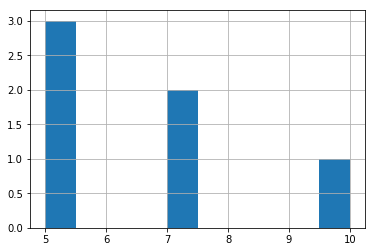

In [13]:
notas_histograma = notas.hist()

### Flexibilidade para aplicar expressões e funções matemáticas do numpy diretamente sobre a série:

In [14]:
# sobre todos os campos numéricos
notas**2

Wilton       49
Amanda       49
Hamilton     25
Júlia       100
Carla        25
Samuel       25
dtype: int64

In [15]:
import numpy as np

np.log(notas) # logaritmo natural

Wilton      1.945910
Amanda      1.945910
Hamilton    1.609438
Júlia       2.302585
Carla       1.609438
Samuel      1.609438
dtype: float64

In [18]:
print(np.max(notas))
# notas.max()

print(max(notas))

10
10


# DataFrames
É uma estrutura bidimensional de dados, como uma planilha.

In [19]:
# Usando um dicionário como entrada dos dados
df = pd.DataFrame({"Aluno" :    ["Wilton", "Amanda", "Hamilton", "Júlia", "Carla", "Samuel"],
                   "Faltas" :   [3, 1, 2, 1, 2, 2],
                   "Prova" :    [2, 7, 5, 10, 6, 7],
                   "Seminário": [8.5, 7.5, 9.0, 7.5, 8.0, 7.5],
                   "Sexo":      ["H", "M", "H", "M", "M", "H"]
                   })
df

,Aluno,Faltas,Prova,Seminário,Sexo
0,Wilton,3,2,8.5,H
1,Amanda,1,7,7.5,M
2,Hamilton,2,5,9.0,H
3,Júlia,1,10,7.5,M
4,Carla,2,6,8.0,M
5,Samuel,2,7,7.5,H


In [20]:
# Qual o tipo de cada coluna?
df.dtypes

Aluno         object
Faltas         int64
Prova          int64
Seminário    float64
Sexo          object
dtype: object

In [21]:
df.columns

Index(['Aluno', 'Faltas', 'Prova', 'Seminário', 'Sexo'], dtype='object')

In [22]:
df["Aluno"]

0      Wilton
1      Amanda
2    Hamilton
3       Júlia
4       Carla
5      Samuel
Name: Aluno, dtype: object

In [25]:
df.sort_values(by="Seminário", ascending=False)

,Aluno,Faltas,Prova,Seminário,Sexo
2,Hamilton,2,5,9.0,H
0,Wilton,3,2,8.5,H
4,Carla,2,6,8.0,M
1,Amanda,1,7,7.5,M
3,Júlia,1,10,7.5,M
5,Samuel,2,7,7.5,H


In [26]:
df.describe()

,Faltas,Prova,Seminário
count,6.000000,6.000000,6.000000
mean,1.833333,6.166667,8.000000
std,0.752773,2.639444,0.632456
min,1.000000,2.000000,7.500000
25%,1.250000,5.250000,7.500000
50%,2.000000,6.500000,7.750000
75%,2.000000,7.000000,8.375000
max,3.000000,10.000000,9.000000


In [27]:
# Selecionar pelo index
df.loc[2]  # Linha

Aluno        Hamilton
Faltas              2
Prova               5
Seminário           9
Sexo                H
Name: 2, dtype: object

In [28]:
df.loc[2, "Aluno"]  # Célula

'Hamilton'

In [29]:
df.loc[df.index, ["Aluno", "Seminário"]]

,Aluno,Seminário
0,Wilton,8.5
1,Amanda,7.5
2,Hamilton,9.0
3,Júlia,7.5
4,Carla,8.0
5,Samuel,7.5


In [0]:
df.loc[df.index, ["Aluno", "Seminário"]].sort_values(by="Seminário", ascending=False)

In [31]:
# Critério de seleção
df[df["Seminário"] > 8.0]
# df["Seminário"] > 8.0

,Aluno,Faltas,Prova,Seminário,Sexo
0,Wilton,3,2,8.5,H
2,Hamilton,2,5,9.0,H


In [30]:
df[(df["Seminário"] > 7.0) & (df["Prova"] >= 7)] # & é um operador bitwise sobre as condições True e False (1 e 0)

,Aluno,Faltas,Prova,Seminário,Sexo
1,Amanda,1,7,7.5,M
3,Júlia,1,10,7.5,M
5,Samuel,2,7,7.5,H


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f995796c278>]],
      dtype=object)

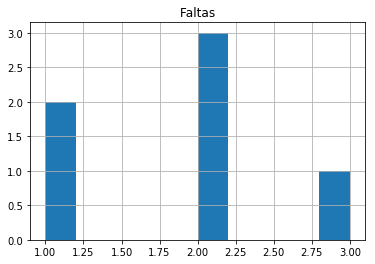

In [32]:
df.hist(column="Faltas")

(array([2., 0., 0., 0., 0., 3., 0., 0., 0., 1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

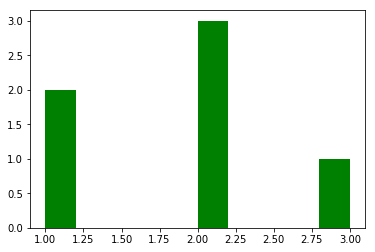

In [40]:
import matplotlib as plt

plt.pyplot.hist(df["Faltas"], color='green')

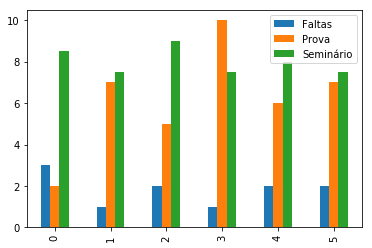

In [41]:
df.plot.bar()

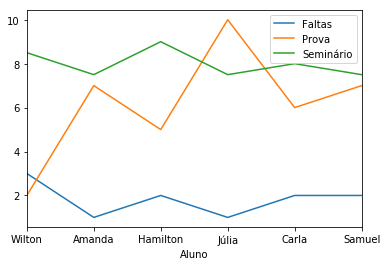

In [42]:
df.plot.line(x="Aluno")

In [0]:
df.plot.area(x="Aluno", y=["Prova", "Seminário"])
df

# Pandas
### Vimos como manipular dados que foram criados em tempo de execução.
Acontece que, na maioria das vezes, queremos analisar dados que já estão prontos e disponíveis.

## Sites que fornecem datasets para download:
* http://www.dados.df.gov.br/
* https://brasil.io/datasets
* http://dados.gov.br/dataset
* https://dadosabertos.camara.leg.br/
* http://www.transparencia.mg.gov.br/dados-abertos

In [0]:
import pandas as pd

# Importação de dataframes

In [0]:
# A exclamação antes executa como comando do console
!pip3 install wget

In [0]:
# Baixar o arquivo primeiro
!pip3 install wget

import wget

url = "https://github.com/alexaldr/curso_de_python/blob/master/dataframes/cursos-prouni.csv?raw=true"

file_name = wget.download(url, "dataframe_prouni.csv")

# ler o arquivo para um dataframe
df2 = pd.read_csv("dataframe_prouni.csv")
df2.sample(3)

In [59]:
# dataframe que vamos trabalhar 
df = pd.read_csv("https://github.com/alexaldr/curso_de_python/blob/master/dataframes/capes-bolsas.zip?raw=true",
                 sep=",",
                 compression="zip"                 
                 )
# pd.read_csv
# pd.read_excel
# pd.read_html
# pd.read_json
# pd.read_sql
df.sample(3)

,Unnamed: 0,Ano,UF,Município,Região,Código Programa,Programa Fomento,IES,Status Jurídico,Programa,Área Avaliação,Área Conhecimento,Grande Área,Codigo IES,Coordenador Geral IsF,Coordenador Pedagógico IsF,DOUTORADO PLENO,Iniciação Científica,JOVENS TALENTOS - A,JOVENS TALENTOS - B,MESTRADO,MESTRADO PROFISSIONAL,PESQUISADOR VISITANTE ESPECIAL,PROF VISITANTE NACIONAL SÊNIOR,PROFESSOR VISITANTE EXTERIOR PLENO,PROFESSOR VISITANTE EXTERIOR SENIOR,Professor IsF,PÓS-DOUTORADO,Total Linha
21765,21766,2016,BA,SALVADOR,NORDESTE,28001010036P7,DS,UFBA,Federal,CIÊNCIA ANIMAL NOS TRÓPICOS,MEDICINA VETERINÁRIA,MEDICINA VETERINÁRIA,CIÊNCIAS AGRÁRIAS,NaN,0.0,0.0,20,0.0,NaN,NaN,26,0.0,NaN,0.0,NaN,NaN,0.0,0.0,46
109800,109801,2005,RJ,RIO DE JANEIRO,SUDESTE,31012019001P2,PROEX,IUPERJ,Privada,SOCIOLOGIA,SOCIOLOGIA,SOCIOLOGIA,CIÊNCIAS HUMANAS,NaN,NaN,NaN,9,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,16
78435,78436,2010,GO,GOIÂNIA,CENTRO-OESTE,52002012013P8,PROCAD/NF,PUC-GOIÁS,Privada,HISTÓRIA,HISTÓRIA,HISTÓRIA,CIÊNCIAS HUMANAS,NaN,NaN,NaN,0,NaN,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,NaN,1.0,3


In [57]:
# algumas vezes pode ser necessário incluir outros parâmetros
df_prouni = pd.read_csv("https://github.com/alexaldr/curso_de_python/blob/master/dataframes/pda-bolsistas-prouni-2018.CSV?raw=true",
                        error_bad_lines=False, # elimina linhas com erro
                        encoding="cp1252",
                        sep=";"
                        )
df_prouni.sample(3)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
112198,2018,270,FACULDADE DE TUPÃ,BOLSA INTEGRAL,PRESENCIAL,EDUCAÇÃO FÍSICA,Noturno,***393388**,Masculino,Preta,1999-06-24,NÃO,SUDESTE,SP,TUPA
128051,2018,13897,FACULDADE LABORO,BOLSA PARCIAL 50%,PRESENCIAL,REDES DE COMPUTADORES,Noturno,***958183**,Masculino,Parda,1988-05-10,NÃO,NORDESTE,MA,SAO LUIS
190636,2018,143,UNIVERSIDADE DE UBERABA,BOLSA INTEGRAL,PRESENCIAL,GESTÃO DO AGRONEGÓCIO,Noturno,***209196**,Feminino,Parda,1984-03-01,NÃO,SUDESTE,MG,UBERABA


In [56]:
df = pd.read_csv("https://github.com/alexaldr/curso_de_python/blob/master/dataframes/forest-fires-in-brazil.zip?raw=true",
                #  error_bad_lines=False,
                 encoding="cp1252",
                 sep=",",
                 compression="zip"
                 )
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [0]:
# salvar arquivos grandes em disco primeiro
import requests

url = "https://images.pexels.com/photos/1181671/pexels-photo-1181671.jpeg?crop=entropy&cs=srgb&dl=adult-coder-developer-1181671.jpg&fit=crop&fm=jpg&h=1281&w=1920"
response = requests.get(url, stream=True)

# verifica se houve resposta 200 e salva o arquivo em chuncks (pedaços)
if response.status_code == 200:
    with open('wallpaper.jpg', 'wb') as handle:
        for block in response.iter_content(1024):
            handle.write(block)
        print("Arquivo salvo com sucesso!")
        print("Photo by Christina Morillo (from Pexels)\n"+
              "https://www.pexels.com/photo/python-book-1181671/")
else:
    print("Impossível salvar o arquivo!\n"+
          f"Erro {response.status_code}")

# A título de curiosidade
# Exibir imagens no Jupyter Notebook
from IPython.display import Image, display
display(Image(filename="wallpaper.jpg", width=700))

# Manipulação de dataframes

In [60]:
# número de linhas e colunas
df.shape

(136114, 29)

In [0]:
# nomes das colunas
df.columns

In [0]:
# tipos das colunas
df.dtypes

In [0]:
# mudar o tipo de uma coluna
df["Codigo IES"] = df["Codigo IES"].astype("object")

In [0]:
df.head()

In [0]:
df.tail()

In [0]:
df.sample(5)

In [0]:
# axis=0:   linhas
# axis=1:   colunas
# inplace:  modifica o próprio dataframe
df.drop("Unnamed: 0", axis=1, inplace=True)
# del df["Unnamed: 0"]
df.head()

In [0]:
# se estiver desordenado
df.sort_values("Ano", inplace=True)
df.head()

In [0]:
df.describe()

In [0]:
df["MESTRADO"].describe()

In [0]:
df["UF"].value_counts()

In [0]:
# filtros
df[df["Ano"]>=2018].sample(5)

In [0]:
# primeiras cinco linhas + colunas 1 à 6
df.iloc[0:5, 1:7]

# df.iloc[136100:-5, 8:4:-1]

In [0]:
# primeiras linhas + colunas por label
df.loc[1:5, ["Ano", "IES", "UF"]]
# Ordem?

In [0]:
df.sort_index(inplace=True)
df.head()

In [0]:
# soma dos campos com valores nulos (True=1)
df.isnull().sum()

In [0]:
# substitui nulos (NaN) pelo valor passado
df.fillna(0)

In [0]:
# exlui linhas ou colunas que possuem algum valor nulo
df.dropna(inplace=True)

In [0]:
df.isnull().sum()
# df.shape

In [0]:
# df.loc[df["IES"]=="UNIMONTES"].loc[df["Área Conhecimento"]=="SAÚDE E BIOLÓGICAS"].sort_values("Ano").sample(5)
unimontes = df.loc[df["IES"]=="UNIMONTES"]
unimontes.sample(5)

In [0]:
# Podemos excluir colunas que não fazem mais sentido para o novo dataframe
unimontes.drop("Região", axis=1, inplace=True)
unimontes.head(3)

In [0]:
# Change the index to be based on the 'id' column

unimontes["index_1"] = list(i for i in range(0, unimontes.shape[0]))
unimontes.head(3)

In [0]:
# insert at index
unimontes.insert(2, "index_2", list(i for i in range(0, unimontes.shape[0])) )
unimontes.head(3)

In [0]:
unimontes.set_index("ind", inplace=True)
unimontes.head(3)

In [0]:
unimontes.to_excel("bolsas_capes_unimontes.xls", encoding="cp1252")

In [0]:
unimontes.rename(str.upper, axis="columns", inplace=True)
# unimontes = unimontes.rename(columns=(lambda x: x.replace(" ", "_"))).copy()
# unimontes = unimontes.rename(columns={"UF":"uf"}).copy()

unimontes.columns

In [0]:
# recriar o dataframe unimontes
unimontes = df.loc[df["IES"]=="UNIMONTES"]
unimontes.sample(3)

In [0]:
# listagem dos valores únicos da coluna
unimontes["Área Conhecimento"].unique()

In [0]:
# contagem dos valores únicos das colunas
unimontes.nunique()

In [0]:
# IES? 
unimontes.groupby("Área Conhecimento")["IES"].count()

# for i in (unimontes.groupby("Área Conhecimento")["IES"]):
#     print(*i)

In [0]:
# IES, UF, Ano
unimontes.groupby("Área Conhecimento")["IES"].count() == unimontes.groupby("Área Conhecimento")["Iniciação Científica"].count()

In [0]:
list(unimontes["Área Conhecimento"].value_counts()) == list(unimontes.groupby("Área Conhecimento")["IES"].count().sort_values(ascending=False))

# Visualização de dataframes

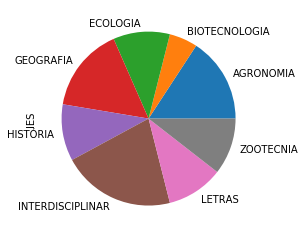

In [89]:
# unimontes.groupby("Área Conhecimento")["IES"].count().plot.bar()

unimontes_areas = unimontes.groupby("Área Conhecimento")["IES"].count()
unimontes_areas.plot.pie()

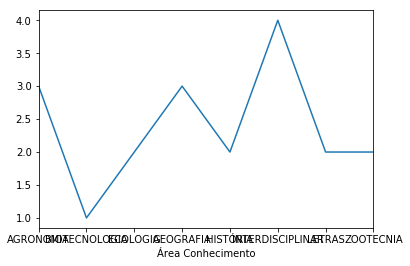

In [90]:
unimontes_areas.plot.line()

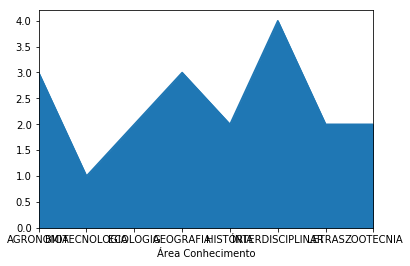

In [91]:
unimontes_areas.plot.area()

In [0]:
unimontes_areas.plot.bar()

In [0]:
unimontes_areas.plot.barh()

In [0]:
unimontes_areas.sort_values().plot.barh()

In [0]:
unimontes_areas.sort_values().plot.barh(figsize=(8, 8))

In [0]:
unimontes_areas.sort_values().plot.barh(figsize=(8, 8),
                                        title="Áreas de Pesquisa na Unimontes",
                                        # grid=True,
                                        legend="Gráfico de barras horizontal",
                                        style=[":", "--"],
                                        fontsize=12,
                                        colors = ["#89ABCD", "#789ABC", "#6789AB", "#56789A",
                                                  "#456789", "#345678", "#234567", "#123456"],                                
                                        )

# Matplotlib

###Se uma imagem vale mais que mil palavras, então diga isso com uma imagem.
_(Millôr Fernandes)_

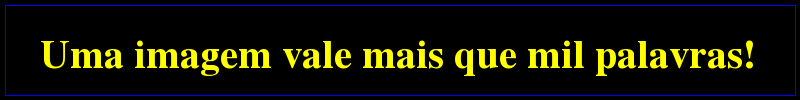

In [93]:
# Curiosidade
from PIL import Image, ImageDraw, ImageFont

img = Image.new("RGB", (800, 100), color = (0, 0, 0))
 
fnt = ImageFont.truetype(
    "/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf", 40)
d = ImageDraw.Draw(img)
d.text((40,25), "Uma imagem vale mais que mil palavras!", font=fnt, fill=(255, 255, 0))
d.rectangle([(5, 5), (795, 95)], fill=None, outline="blue", )

img.save("text_to_image.png")
img

In [0]:
# importação do módulo
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

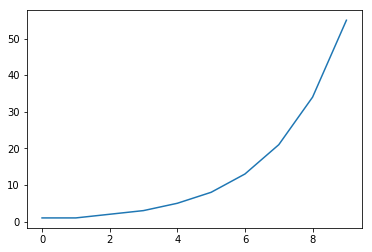

In [95]:
# suficiente: uma série
y = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

plt.plot(y)
plt.show()

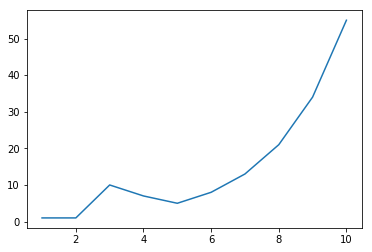

In [101]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 1, 10, 7, 5, 8, 13, 21, 34, 55]

plt.plot(x, y)
plt.show()

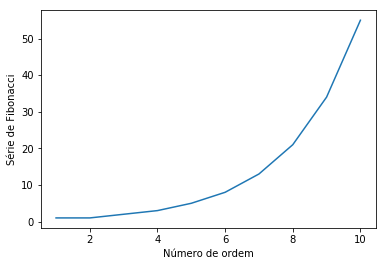

In [102]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

# rótulos eixo x e y
plt.xlabel('Número de ordem')
plt.ylabel('Série de Fibonacci')

plt.plot(x, y)
plt.show()

#Format Strings
>    fmt = "[color][marker][line]"

Serve para formatar a cor, estilo dos pontos e estilo da linha.

**Colors**  

* "b": blue
* "g": green 
* "r": red
* "c": cyan
* "m": magenta
* "y": yellow
* "k": black
* "w": white

**Markers**  
* ".": point marker
* ",": pixel marker
* "o": circle marker
* "v": triangle_down marker
* "^": triangle_up marker
* "<": triangle_left marker
* ">": triangle_right marker
* "1": tri_down marker
* "2": tri_up marker
* "3": tri_left marker
* "4": tri_right marker
* "s": square marker
* "p": pentagon marker
* "\*": star marker
* "h": hexagon1 marker
* "H": hexagon2 marker
* "+": plus marker
* "X": x marker
* "x": thin_x marker
* "D": diamond marker
* "d": thin_diamond marker
* "|": vline marker
* "_": hline marker

**Line Styles**  
* "-": solid line style
* "--": dashed line style
* "-.": dash-dot line style
* ":": dotted line style

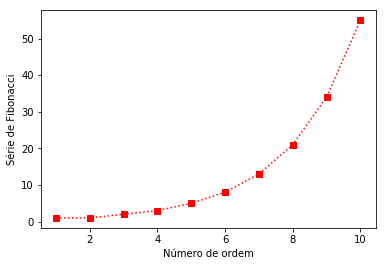

In [103]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

plt.xlabel('Número de ordem')
plt.ylabel('Série de Fibonacci')

plt.plot(x, y, "rs:")
plt.show()

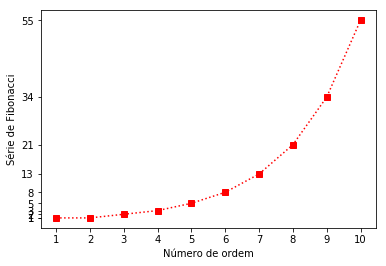

In [104]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

plt.xlabel('Número de ordem')
plt.ylabel('Série de Fibonacci')

# valores do eixo x e y
plt.xticks(x)
plt.yticks(y)

plt.plot(x, y, "rs:")
plt.show()

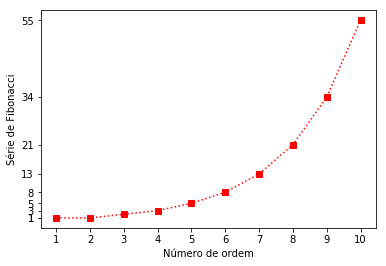

In [105]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

plt.xlabel('Número de ordem')
plt.ylabel('Série de Fibonacci')

plt.xticks(x)

# limitar eixo y
plt.yticks(list(i for i in y if i >=3 or i==1))

plt.plot(x, y, "rs:")
plt.show()

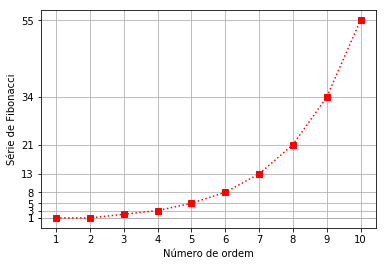

In [109]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

plt.xlabel('Número de ordem')
plt.ylabel('Série de Fibonacci')

plt.xticks(x)
plt.yticks(list(i for i in y if i >=3 or i==1))

# grid
plt.grid(True, which="both", axis="both")

plt.plot(x, y, "rs:")
plt.show()

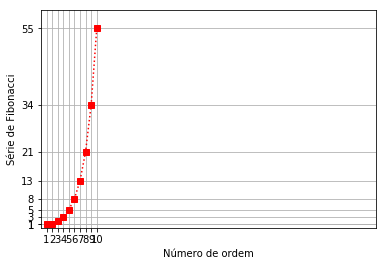

In [110]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

plt.xlabel('Número de ordem')
plt.ylabel('Série de Fibonacci')

plt.xticks(x)
plt.yticks(list(i for i in y if i >=3 or i==1))

plt.grid(True, which="both", axis="both")

# escala igualitária x vs y
plt.xlim(0, 60)
plt.ylim(0, 60)

plt.plot(x, y, "rs:")
plt.show()

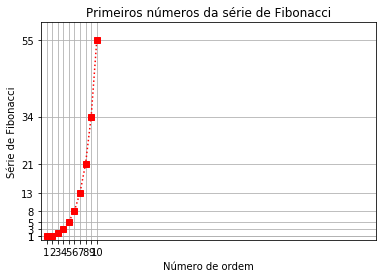

In [111]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

plt.xlabel('Número de ordem')
plt.ylabel('Série de Fibonacci')

plt.xticks(x)
plt.yticks(list(i for i in y if i >=3 or i==1))

plt.grid(True, which="both", axis="both")

plt.xlim(0, 60)
plt.ylim(0, 60)

# Título
plt.title("Primeiros números da série de Fibonacci")

plt.plot(x, y, "rs:")
plt.show()

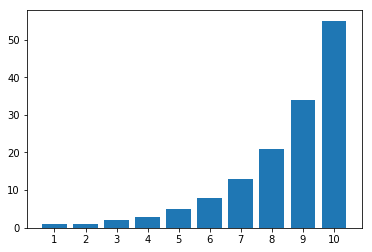

In [112]:
plt.bar(x, y)
plt.xticks(x)
plt.show()

In [0]:
plt.barh(x, y)
plt.yticks(x)
plt.show()

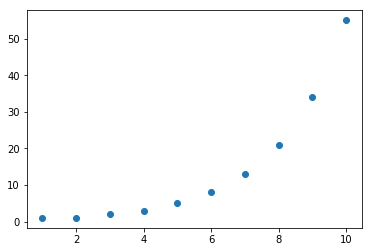

In [113]:
plt.scatter(x,y)
plt.show()

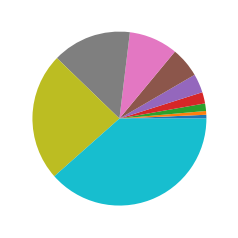

In [114]:
plt.pie(y)
plt.show()

In [0]:
print(*plt.style.available, sep="\n")

In [0]:
y = [1, 1, 2, 1, 7, 8, 3, 4, 3, 5, 7, 1, 3, 2, 1, 9]
plt.hist(y)
plt.show()

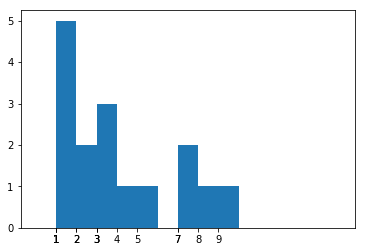

In [115]:
y = [1, 1, 2, 1, 7, 8, 3, 4, 3, 5, 7, 1, 3, 2, 1, 9]
plt.xticks(y)
plt.hist(y, bins=range(0,len(y))) # alinhados a esquerda
plt.show()

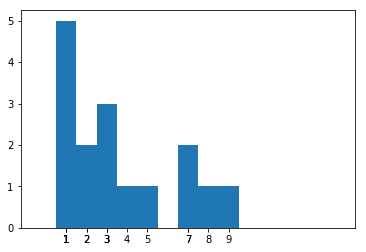

In [117]:
import numpy as np

y = [1, 1, 2, 1, 7, 8, 3, 4, 3, 5, 7, 1, 3, 2, 1, 9]
plt.xticks(y)

plt.hist(y, bins=np.arange(len(y))-0.5) # alinhados ao centro
plt.show()

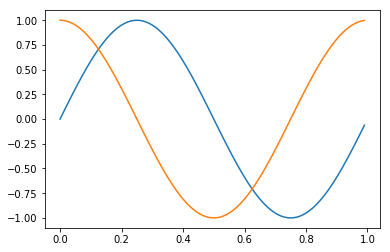

In [118]:
import numpy as np

t = np.arange(0.0, 1.0, 0.01)

plt.plot(t, np.sin(2*np.pi*t))
plt.plot(t, np.cos(2*np.pi*t))

plt.show()

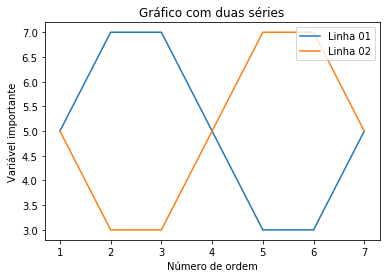

In [119]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [5, 7, 7, 5, 3, 3, 5]

x2 = [1, 2, 3, 4, 5, 6, 7]
y2 = [5, 3, 3, 5, 7, 7, 5]

plt.plot(x, y, label="Linha 01", )
plt.plot(x2, y2, label="Linha 02")

plt.xlabel("Número de ordem")
plt.ylabel("Variável importante")

plt.title("Gráfico com duas séries")
# adicionar legenda
plt.legend()
plt.show()

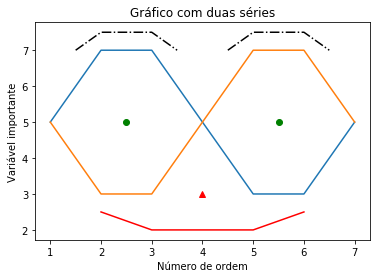

In [122]:
# infinito ou carinha?
x = [1, 2, 3, 4, 5, 6, 7]
y = [5, 7, 7, 5, 3, 3, 5]

x2 = [1, 2, 3, 4, 5, 6, 7]
y2 = [5, 3, 3, 5, 7, 7, 5]

plt.plot(x, y, label="Linha 01", )
plt.plot(x2, y2, label="Linha 02")

# adicionais
plt.plot([1.5, 2, 2.5, 3, 3.5],[7, 7.5, 7.5, 7.5, 7], "k-.")
plt.plot([4.5, 5, 5.5, 6, 6.5],[7, 7.5, 7.5, 7.5, 7], "k-.")
plt.plot([2.5, 5.5], [5, 5], "go")
plt.plot(4, 3, "r^")
plt.plot([2, 3, 4, 5, 6], [2.5, 2, 2, 2, 2.5], "r-")


plt.xlabel("Número de ordem")
plt.ylabel("Variável importante")

plt.title("Gráfico com duas séries")

plt.show()

### [Clique aqui](https://docs.python.org/3/library/stdtypes.html#printf-style-string-formatting) para ver outras opções de conversão em formatação de strings, conforme exemplo abaixo.

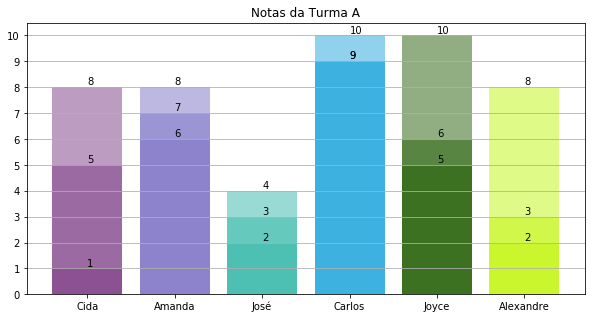

In [132]:
plt.figure(figsize=(10,5))
# mais de uma série em um gráfico
notas_provas = {"Cida": [5, 8, 1], "Amanda": [7, 6, 8], "José": [4, 2, 3],
                "Carlos": [10, 9, 9], "Joyce": [6, 5, 10], "Alexandre": [3, 2, 8]}

# lista com todas as notas separadas por listas
notas = [nota for nota in notas_provas.values()]

# função para gerar aleatoriamente uma HEX COLOR (#FFFFFF)
def random_color():
    import random
    r = lambda: random.randint(0,255) # 255 = FF
    hex_number = f"#{r():02x}{r():02x}{r():02x}"
    return hex_number

i = 0
# lista de notas de cada aluno
for aluno_nota in notas:
    # cada nota de um aluno
    cor = random_color()
    for nota in aluno_nota:
        plt.bar(i, nota, align="center", width=0.8, alpha=0.5, color=cor)
        # parâmetros = (x, y, valor)
        plt.text(i, nota+0.1, nota)
    i += 1

# grid no eixo y
plt.grid(True, axis="y")

# Título
plt.title("Notas da Turma A")

# comprimento e rótulos
plt.xticks(range(len(notas_provas)), list(notas_provas.keys()))
plt.yticks(range(11))

plt.show()

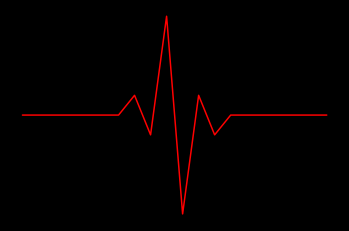

In [133]:
import matplotlib.pyplot as plt
x = [i for i in range(1, 21)]
y = [5, 5, 5, 5, 5, 5, 5, 6, 4, 10, 0, 6, 4, 5, 5, 5, 5, 5, 5, 5]

# para usar um estilo temporariamente
with plt.style.context(["seaborn-dark", "dark_background"]):
    plt.tick_params(axis="both",
                    bottom=False,
                    left=False,
                    labelbottom=False,
                    labelleft=False)
    plt.plot(x,y, "r-")
    # salvar em disco
    plt.savefig("./grafico_batimentos.png")

## Já vimos a forma básica de criar gráficos, porém o matplotlib nos fornece uma gama muito maior de opções.

## Para isso, precisamos antes entender como funcionam as suas partes.

## Partes de um gráfico

!["Esquema das partes de um gráfico Matplotlib"](https://files.realpython.com/media/fig_map.bc8c7cabd823.png) 

##Conceitos Gerais


###Uma figura do Matplotlib pode ser categorizada em várias partes:

* **Figure**: é uma figura inteira que pode conter um ou mais de um eixo (plotagens). Você pode pensar em uma figura como uma tela que contém gráficos. É o nível mais alto.

* **Axes**: é o que adicionamos ao _Figure_. Uma figura pode conter muitos _Axes_. Ele contém dois ou três objetos do tipo _Axis_ (no caso de 3D). Cada _Axes_ tem um title, um label x e um label y.

* **Axis**: são a linha numérica como objetos e cuidam da geração dos limites do gráfico.

* **Artist**: Tudo o que se pode ver na figura é um artista como objetos de texto, objetos Line2D, objetos de coleção. A maioria dos artistas está ligada aos machados.

![Esquema das partes de um gráfico Matplotlib 2](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Matplotlib+Tutorial/content_content_unknown.png)

# Vejamos os detalhes do gráfico:
![Anatomia de um gráfico Matplotlib](https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)

In [0]:
fig = plt.figure(figsize=(10, 10))

# ax1 será meu objeto a ser plotado dentro de fig
ax1 = fig.add_subplot(221) # (nrows, ncols, index)

# setando parâmetros do objeto ax1
ax1.set_xlim([0.5, 4.5])
ax1.set_ylim([-2, 8])

ax1.set_title("Título do \"EIXOS\" 1")

ax1.set_ylabel("Rótulo do eixo Y")
ax1.set_xlabel("Rótulo do eixo X")

# --------------------------------------
# criando outro objeto, mas no index 4 agora
ax4 = fig.add_subplot(224)

ax4.set_xlim([0.5, 4.5])
ax4.set_ylim([-2, 8])

ax4.set_title("Título do \"EIXOS\" 4")

ax4.set_ylabel("Rótulo do Y, eixos 4")
ax4.set_xlabel("Rótulo do X, eixos 4")

# --------------------------------------
plt.show()

In [0]:
import matplotlib.pyplot as plt

# objeto figura
fig = plt.figure()
# eixos
ax = fig.add_subplot(111)

ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.bar([1, 2, 3], [i*i for i in range(2, 5)], color='red', width=0.5)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
# intervalo do eixo x
ax.set_xlim(0.5, 4.5)

plt.show()

In [0]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.bar([1, 2, 3], [i*i for i in range(2, 5)], color='red', width=0.5)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
# %matplotlib
plt.xlim(0.5, 4.5)
plt.show()

## [Clique aqui para visualizar a galeria do Matplotlib](https://matplotlib.org/gallery/index.html)


 Obs: Existem também outras bibliotecas para criação de gráficos com Python, como por exemplo a Seaborn e a Plotly.


# Desafios:

* Gerar

In [140]:
!dir


bolsas_capes_unimontes.xls  grafico_batimentos.png  text_to_image.png
dataframe_prouni.csv	    sample_data		    wallpaper.jpg


<br/>
<br/>
<br/>
<br/>

![Python logo](https://www.python.org/static/community_logos/python-logo-generic.svg)
# Onde aprender mais:
* [Documentação do Python 3](https://docs.python.org/3/)
---
* Coursera - [Introdução à Ciência da Computação com Python - parte 01 - USP](https://pt.coursera.org/learn/ciencia-computacao-python-conceitos)
* Coursera - [Introdução à Ciência da Computação com Python - parte 02 - USP](https://pt.coursera.org/learn/ciencia-computacao-python-conceitos-2)
---
* Youtube - [Curso em Vídeo - Python 3 - Mundo 01](https://www.youtube.com/playlist?list=PLHz_AreHm4dlKP6QQCekuIPky1CiwmdI6)
* Youtube - [Curso em Vídeo - Python 3 - Mundo 02](https://www.youtube.com/playlist?list=PLHz_AreHm4dk_nZHmxxf_J0WRAqy5Czye)
* Youtube - [Curso em Vídeo - Python 3 - Mundo 03](https://www.youtube.com/playlist?list=PLHz_AreHm4dksnH2jVTIVNviIMBVYyFnH)
* Youtube - [Python 300](https://www.youtube.com/playlist?list=PL8eBmR3QtPL0j3QLEjQ6rcx8rVB8Ir893)
* Youtube - [Python para Zumbis](https://www.youtube.com/playlist?list=PLUukMN0DTKCtbzhbYe2jdF4cr8MOWClXc)
* Youtube - [Aulas Python - Ignorância Zero](https://www.youtube.com/playlist?list=PLfCKf0-awunOu2WyLe2pSD2fXUo795xRe)
* Youtube - [Análise de Dados em Python - LabHacker](https://www.youtube.com/playlist?list=PLqiFjCF_dtcymXtdjwAP4s7tRoW4CYwnH)
---
* Telegram - [Live de Python](https://t.me/livepython)
---
* [GeeksForGeeks](https://www.geeksforgeeks.org/python-programming-language/)
* [W3Schools](https://www.w3schools.com/python/)
* [LearnPython](https://www.learnpython.org/)
* [DataCamp](https://www.datacamp.com/courses/tech:python)
* [TutorialsPoint](https://www.tutorialspoint.com/python)
* [Apostila Python e Orientação à Objetos - Caelum](https://www.caelum.com.br/download/caelum-python-objetos-py14.pdf)
* [PythonAcademy](https://pythonacademy.com.br)
